Using TensorFlow backend.
C:\Users\Neelesh\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Neelesh\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Neelesh\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np


Model saved to random_forest_model.joblib


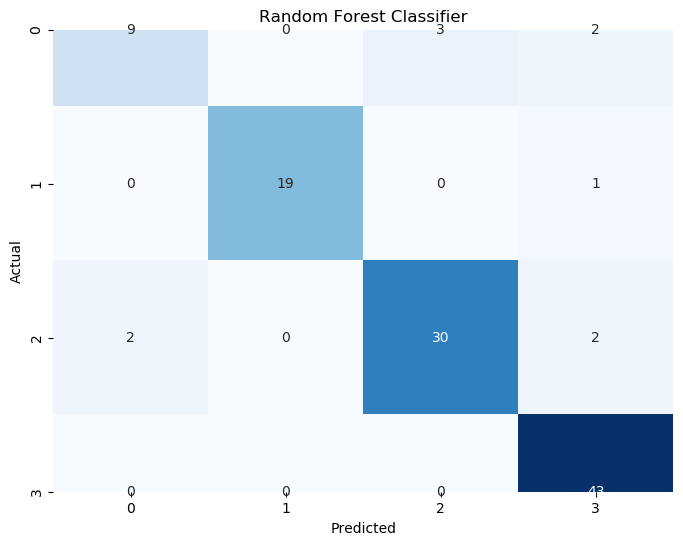

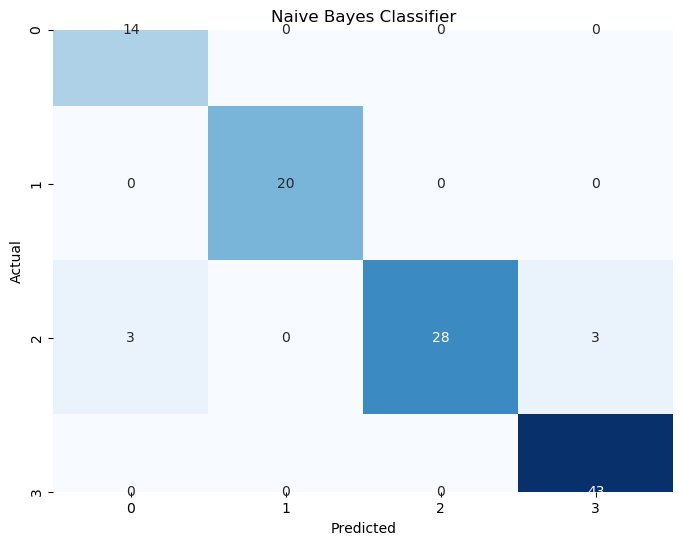

In [ ]:


from tkinter import messagebox
from tkinter import *
from tkinter import simpledialog
import tkinter
import matplotlib.pyplot as plt
import numpy as np
from tkinter import ttk
from tkinter import filedialog
from sklearn.metrics import accuracy_score
import os
import cv2
from tkinter import END  # Assuming you're using Tkinter for GUI
import pickle
import joblib
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier



main = Tk()
main.title("Innovative Multi-feature Based Weather Classification for Supervised Learning in Multi-class Environments")
main.geometry("1300x1200")

global filename
global X, Y
global model
global accuracy


base_model = VGG16(weights='imagenet', include_top=False)

# Function to extract features using VGG16
def extract_vgg16_features(img_path):
    if isinstance(img_path, bytes):
        # Decode the bytes to a string using utf-8 encoding
        img_path = img_path.decode('utf-8')
        
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = base_model.predict(x)
    return features.flatten()

# Initialize empty lists for features and labelsz
X_features = []
y_labels = []

# Traverse through subfolders in the "data" folder
data_folder = 'data'
class_names = ['Cloudy','Rain','Shine','Sunrise']


global accuracy, precision, recall, f1
def uploadDataset():
    global X, Y
    global filename
    text.delete('1.0', END)
    filename = filedialog.askdirectory(initialdir=".")
    text.insert(END,'dataset loaded\n')

def imageProcessing():
    global X,Y,X_train, X_test, y_train, y_test
    model_data_path = "model/myimg_data.txt.npy"
    model_label_path = "model/myimg_label.txt.npy"

    if os.path.exists(model_data_path) and os.path.exists(model_label_path):
        # If files exist, load them
        X = np.load(model_data_path)
        Y = np.load(model_label_path)
        text.insert(END, 'Model files loaded\n')
    else:
        # If files don't exist, process images and save the model files
         # Add your actual class names
        data_folder = r"C:\Users\Neelesh\Desktop\Multi-class Weather Dataset\Multi-class Weather Dataset"  # Update with your data folder path

        X_features = []
        y_labels = []

        for class_label, class_name in enumerate(class_names):
            class_folder = os.path.join(data_folder, class_name)
            for img_file in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_file)

                # Extract features and append to the lists
                features = extract_vgg16_features(img_path)
                X_features.append(features)
                y_labels.append(class_label)

        # Convert lists to NumPy arrays
        X = np.array(X_features)
        Y = np.array(y_labels)

        # Save processed images and labels
        np.save(model_data_path, X)
        np.save(model_label_path, Y)
        text.insert(END, 'Image processing completed\n')

    # Data splitting
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
    
    # Display the shape of X_train and X_test
    text.insert(END, f'Shape of X_train: {X_train.shape}\n')
    text.insert(END, f'Shape of X_test: {X_test.shape}\n')

def Model():
    global model,X_test
    global accuracy_rf, precision_rf, recall_rf, f1_rf,RandomForestClassifier
    global accuracy
    model_filename='random_forest_model.joblib'
    text.delete('1.0', END)
    if os.path.exists('model/random_forest_model.joblib'):
        model = joblib.load('model/random_forest_model.joblib')

    else:
        # Train a new RandomForestClassifier if the model file doesn't exist
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
    
        # Save the trained RandomForestClassifier to a file
        joblib.dump(model, model_filename)
        print(f'Model saved to {model_filename}')
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate and display metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    accuracy_rf = accuracy_score(y_test, y_pred)*100
    precision_rf = precision_score(y_test, y_pred, average='weighted')*100
    recall_rf = recall_score(y_test, y_pred, average='weighted')*100
    f1_rf = f1_score(y_test, y_pred, average='weighted')*100
    
    # Insert results into Tkinter text widget
    text.insert(END, "Random Forest Confusion Matrix:\n")
    text.insert(END, f"{conf_matrix}\n\n")
    text.insert(END, "Classification Report:\n")
    text.insert(END, f"{class_report}\n")
    text.insert(END, f"Accuracy: {accuracy_rf}\n")
    text.insert(END, f"Precision: {precision_rf}\n")
    text.insert(END, f"Recall: {recall_rf}\n")
    text.insert(END, f"F1 Score: {f1_rf}\n")
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Random Forest Classifier')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
def EModel():
    global accuracy, precision, recall, f1
    model_filename = 'naive_bayes_model.joblib'
    text.delete('1.0', END)
    if os.path.exists(model_filename):
        # Load the existing model if it already exists
        classifier = joblib.load(model_filename)
        text.insert(END, f'Model loaded from {model_filename}\n')
    else:
        # Train a new Multinomial Naive Bayes classifier if the model file doesn't exist
        classifier = MultinomialNB()
        classifier.fit(X_train, y_train)
    
        # Save the trained Multinomial Naive Bayes classifier to a file
        joblib.dump(classifier, model_filename)
        text.insert(END, f'Model saved to {model_filename}\n')
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Calculate metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)*100
    precision = precision_score(y_test, y_pred, average='weighted')*100
    recall = recall_score(y_test, y_pred, average='weighted')*100
    f1 = f1_score(y_test, y_pred, average='weighted')*100
    
    # Insert results into Tkinter text widget
    text.insert(END, "Naive Bayes Confusion Matrix:\n")
    text.insert(END, f"{conf_matrix}\n\n")
    text.insert(END, "Classification Report:\n")
    text.insert(END, f"{class_report}\n")
    text.insert(END, f"Accuracy: {accuracy}\n")
    text.insert(END, f"Precision: {precision}\n")
    text.insert(END, f"Recall: {recall}\n")
    text.insert(END, f"F1 Score: {f1}\n")
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Naive Bayes Classifier')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
def predict():
    global model, base_model_vgg16, class_names
    filename = filedialog.askopenfilename(initialdir="testImages")
    
    # Load the image and extract features using VGG19
    img_path = filename
    features = extract_vgg16_features(img_path)
    
    # Make predictions using the model
    preds = model.predict(features.reshape(1, -1))
       
    # Display the result on the image
    img = cv2.imread(filename)
    img = cv2.resize(img, (800, 400))
    
    if isinstance(preds, (list, np.ndarray)):
        preds = int(preds[0])  # Adjust this line based on the structure of your preds array
    else:
        preds = int(preds)

    # Now use preds as an index in class_names
    class_label = class_names[preds]
    
    text_to_display = f'Satellite Image Recognized as: {class_label} '
    
    cv2.putText(img, text_to_display, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    
    cv2.imshow(f'Satellite Image Recognized as: {class_label}', img)
    cv2.waitKey(0)

def graph():
    global accuracy_rf, precision_rf, recall_rf, f1_rf
    global accuracy, precision, recall, f1
    text.delete('1.0', END)

    # Prepare data for the comparison graph
    labels = ['Random Forest', 'Naive Bayes']
    accuracy_values = [accuracy_rf, accuracy]
    precision_values = [precision_rf, precision]
    recall_values = [recall_rf, recall]
    f1_values = [f1_rf, f1]

    # Plotting the comparison graph in a single plot with subplots
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.bar(labels, accuracy_values, color=['blue', 'green'])
    plt.title('Accuracy Comparison')

    plt.subplot(2, 2, 2)
    plt.bar(labels, precision_values, color=['blue', 'green'])
    plt.title('Precision Comparison')

    plt.subplot(2, 2, 3)
    plt.bar(labels, recall_values, color=['blue', 'green'])
    plt.title('Recall Comparison')

    plt.subplot(2, 2, 4)
    plt.bar(labels, f1_values, color=['blue', 'green'])
    plt.title('F1 Score Comparison')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


    
def close():
    main.destroy()
    #text.delete('1.0', END)
    
font = ('times', 15, 'bold')
title = Label(main, text='Innovative Multi-feature Based Weather Classification for Supervised Learning in Multi-class Environments"')
title.config(bg='LightBlue1', fg='black')  
title.config(font=font)           
title.config(height=3, width=120)       
title.place(x=0,y=5)

font1 = ('times', 13, 'bold')
ff = ('times', 12, 'bold')

uploadButton = Button(main, text="Upload Dataset", command=uploadDataset)
uploadButton.place(x=20,y=100)
uploadButton.config(font=ff)


processButton = Button(main, text="Image preprocessing", command=imageProcessing)
processButton.place(x=20,y=150)
processButton.config(font=ff)

modelButton = Button(main, text="Build & Train Ensemble Learning Model", command=Model)
modelButton.place(x=20,y=200)
modelButton.config(font=ff)

model1Button = Button(main, text="Build & Train Naive Bayes Model", command=EModel)
model1Button.place(x=20,y=250)
model1Button.config(font=ff)

predictButton = Button(main, text="Upload test image", command=predict)
predictButton.place(x=20,y=300)
predictButton.config(font=ff)

graphButton = Button(main, text="Performance Evaluation", command=graph)
graphButton.place(x=20,y=350)
graphButton.config(font=ff)

exitButton = Button(main, text="Exit", command=close)
exitButton.place(x=20,y=400)
exitButton.config(font=ff)

font1 = ('times', 12, 'bold')
text=Text(main,height=30,width=85)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=450,y=100)
text.config(font=font1)

main.config(bg='SkyBlue1')
main.mainloop()